# MATH 210 Introduction to Mathematical Computing

**March 7, 2025**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Simpson's Rule

$$
S_N(f) = \frac{\Delta x}{3} \sum_{m=1}^{N/2} \left( f(x_{2m-2}) + 4 f(x_{2m-1}) + f(x_{2m}) \right)
$$

Note that the terms $f(x_{2m-2})$, $m=1,\dots,N/2$, correspond to the entries with even index from 0 to N-2.

For example if we want to approximate:

$$
\int_0^{\sqrt{\pi/2}} \sin(x^2) dx
$$

In [2]:
f = lambda x: np.sin(x**2)
a = 0
b = np.sqrt(np.pi/2)
N = 10
dx = (b - a)/N
x = np.linspace(a,b,N+1)
y = f(x)

In [3]:
x

array([0.        , 0.12533141, 0.25066283, 0.37599424, 0.50132565,
       0.62665707, 0.75198848, 0.8773199 , 1.00265131, 1.12798272,
       1.25331414])

In [4]:
y

array([0.        , 0.01570732, 0.06279052, 0.14090123, 0.24868989,
       0.38268343, 0.53582679, 0.6959128 , 0.84432793, 0.95579301,
       1.        ])

We can use fancy indexing to access the entries at even indices from 0 to N-2.

In [5]:
y[ range(0,N,2) ]

array([0.        , 0.06279052, 0.24868989, 0.53582679, 0.84432793])

We can use fancy indexing to access the entries at odd indices from 1 to N-1.

In [6]:
y[ range(1,N,2) ]

array([0.01570732, 0.14090123, 0.38268343, 0.6959128 , 0.95579301])

We can use fancy indexing to access the entries at even indices from 2 to N.

In [7]:
y[ range(2,N+1,2) ]

array([0.06279052, 0.24868989, 0.53582679, 0.84432793, 1.        ])

Use fancy indexing to write a function called `simps` which takes `f`, `a`, `b`, `N`, and returns the Simpson's rule approximation.

In [8]:
def simps(f,a,b,N):
    dx = (b - a)/N
    x = np.linspace(a,b,N+1)
    y = f(x)
    SN = dx/3*np.sum( y[ range(0,N,2) ] + 4*y[ range(1,N,2) ] + y[ range(2,N+1,2) ])
    return SN

Let's compute a very accurate solution with `scipy.integrate.quad`

In [14]:
import scipy.integrate as spi

In [15]:
I,err = spi.quad(f,a,b)

In [16]:
I

0.549276385232169

In [17]:
err

6.098192897676314e-15

In [18]:
simps(f,a,b,100)

0.5492763831697424

Now let us compute $S_N(f)$ for different values $N$ and record the error (compared to `quad` approximation).

In [19]:
Ns = [2,4,8,16,32,64,128]
Es = []
for N in Ns:
    SN = simps(f,a,b,N)
    error = np.abs(I - SN)
    Es.append(error)

Plot $\log(N)$ versus $\log(E)$.

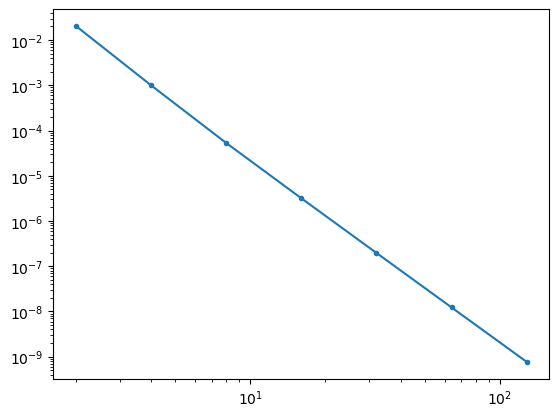

In [20]:
plt.loglog(Ns,Es,'.-')
plt.show()

The line has slope -4. Where does that from? The error bound formula!

The figure shows use that the error is $E \approx C N^{-4}$. This agrees with the error bound formula.